# https://www.kesci.com/mw/project/5e9153d0e7ec38002d01a581/content

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
pima = pd.read_csv(r"D:\Amy\feature_project\diabetes.csv")
#皮马印第安人糖尿病预测数据集

In [4]:
pima

#怀孕次数 --- Number of times pregnant
#2小时口服葡萄糖耐量试验中的血浆葡萄糖浓度 --- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#舒张压（毫米汞柱）--- Diastolic blood pressure (mm Hg)
#2小时血清胰岛素（mu U/ml) --- 2-Hour serum insulin (mu U/ml)
#三头肌皮褶厚度 (毫米) --- Triceps skin fold thickness (mm)
#体重指数（BMI）--- Body mass index (weight in kg/(height in m)^2)
#糖尿病血系功能 --- Diabetes pedigree function
#年龄（年）--- Age (years)
#类别：过去5年内是否有糖尿病 --- Class variable (0 or 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pima.columns=['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness',
                    'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']

In [6]:
pima

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#计算糖尿病患者的人数
pima["onset_diabetes"].value_counts()

0    500
1    268
Name: onset_diabetes, dtype: int64

In [7]:
#计算糖尿病患者的比列
pima["onset_diabetes"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

Text(0.5, 1.0, 'Histogram of plasma_glucose_concentration')

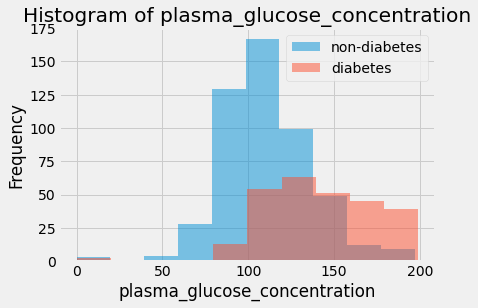

In [8]:
#2小时口服葡萄糖耐量试验中的血浆葡萄糖浓度

#分类画糖尿病患者与非糖尿病患者的 口服2小时后葡萄糖浓度    ，目的观察两者是否有显著的差异

col = 'plasma_glucose_concentration'

plt.hist(pima[pima['onset_diabetes']==0][col],bins=10,alpha=0.5,label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col],bins=10,alpha=0.5,label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))

# 绘制其他列的直方图

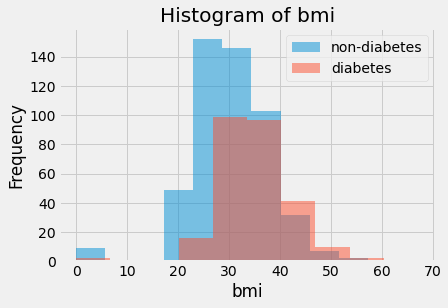

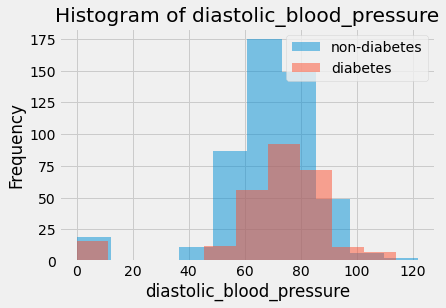

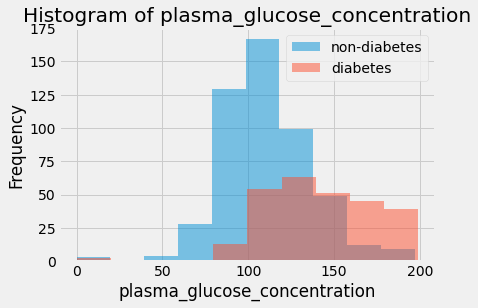

In [9]:
# 绘制其他列的直方图
cols = ['bmi','diastolic_blood_pressure','plasma_glucose_concentration']

for col in cols:
    # 不患糖尿病
    plt.hist(pima[pima['onset_diabetes']==0][col],bins=10,alpha=0.5,label='non-diabetes')
    # 患糖尿病
    plt.hist(pima[pima['onset_diabetes']==1][col],bins=10,alpha=0.5,label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

<AxesSubplot:>

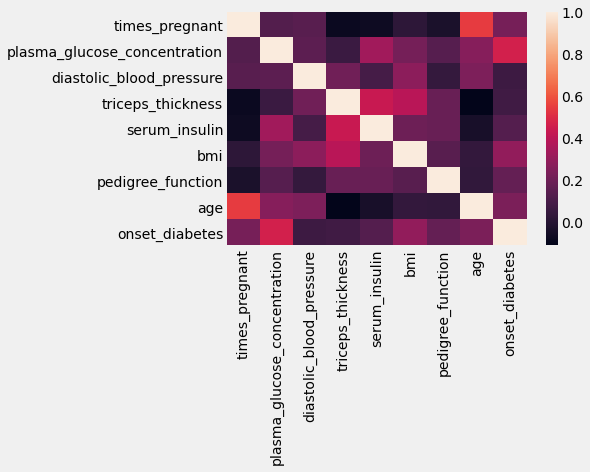

In [10]:
# 数据相关矩阵的热力图
sns.heatmap(pima.corr())

In [30]:
#排序与糖尿病强相关的变量
pima.corr()['onset_diabetes'].sort_values(ascending=False)


onset_diabetes                  1.000000
plasma_glucose_concentration    0.494650
bmi                             0.313680
serum_insulin                   0.303454
triceps_thickness               0.259491
age                             0.238356
times_pregnant                  0.221898
pedigree_function               0.173844
diastolic_blood_pressure        0.170589
Name: onset_diabetes, dtype: float64

In [28]:
#查看各变量缺失值数量
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [29]:
pima.describe()
#观察有异常值的数据，列入bmi=0的值

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# 手动将每列的0替换成None
print(pima['serum_insulin'].isnull().sum())

374


In [32]:
#手动将0替换成缺失值

pima['serum_insulin']=pima['serum_insulin'].map(lambda x:x if x!=0 else None)

In [33]:
print(pima['serum_insulin'].isnull().sum())

374


# 将所有的列中0值替换成缺失值

In [34]:
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']

for  col in columns:
   pima[col]=pima[col].map(lambda x:x if x!=0 else None)


#
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']
for col in columns:
    pima[col].replace([0], [None], inplace=True)

In [35]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

# 删除所有存在缺失的行

In [36]:
pima_dropped=pima.dropna()

In [24]:
pima

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [37]:
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [39]:
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

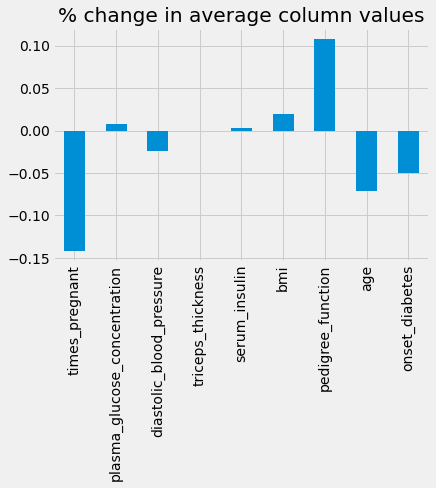

In [40]:
# 均值变化百分比条形图  数据处理前与数据处理后，变量均值变化百分比
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')


In [ ]:
#可以看到，times_pregnant（怀孕次数）的均值在删除缺失值后下降了14%，变化很大！
#pedigree_function（糖尿病血系功能）也上升了11%，也是个飞跃。可以看到，删除行会严重影响数据的形状，所以应该保留尽可能多的数据

# 建模，分类获取准确率，用knn分类模型


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)  # 特征
y_dropped = pima_dropped['onset_diabetes']   # 标签

In [20]:
# GridSearchCV API文档

# sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=False)
# estimator：我们将使用的算法模型，如KNN，SVM等等，可传入除需要确定的最佳参数之外的其他参数。
# param_grid：需要优化的参数的取值，其值为字典或者列表类型。
# scoring：模型的评价标准，默认是使用estimator的误差估计函数。当然我们也可以指定scoring = 'roc_auc'或者'recall'或者'F1_score'等等，具体指定哪种评估标准，需要根据我们的模型estimator来选择。
# n_jobs：CPU并行数，默认为1，-1为使用所有的CPU。
# cv:交叉验证参数，默认为3，可以自己指定。



In [42]:
# KNN的模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}  #确定多少个变量来描述y进行预测
# KNN模型
knn = KNeighborsClassifier()
# 使用网格搜索优化
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)
# 输出结果
print('直接删除缺失值记录的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

直接删除缺失值记录的准确率与最佳参数 
 0.7348263550795197 {'n_neighbors': 7}


# 查看缺失值后，用knn分类模型查看效果

In [43]:
pima_dropped.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [44]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [45]:
# #用中位数填充
# # 用fillna方法填充
# pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(),inplace=True)
# pima.isnull().sum()


#使用Imputer模块批量处理

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)
# 将得到的ndarray类型转化为DataFrame
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns)
pima_imputed.head()

X_imputed = pima_imputed.drop('onset_diabetes', axis=1)  # 特征
y_imputed = pima_imputed['onset_diabetes']   # 标签

In [46]:
pima_imputed 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [47]:
# KNN的模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}  #确定多少个变量来描述y进行预测
# KNN模型
knn = KNeighborsClassifier()
# 使用网格搜索优化
grid = GridSearchCV(knn, knn_params)
grid.fit(X_imputed, y_imputed)
# 输出结果
print('用均值填补缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用均值填补缺失值后的准确率与最佳参数 
 0.7292335115864528 {'n_neighbors': 7}


# 用均值填补缺失值的方法，模型预测准确率降低了

# 用0值填充缺失值

In [48]:
pima_zero = pima.fillna(0)
X_zero = pima_zero.drop('onset_diabetes', axis=1)
y_zero = pima_zero['onset_diabetes']
print("learning from {} rows".format(X_zero.shape[0]))

learning from 768 rows


In [52]:
# KNN的模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
# KNN模型
knn = KNeighborsClassifier()

# 使用网格搜索优化
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)
# 输出结果
print('用 0 值缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 0 值缺失值后的准确率与最佳参数 
 0.7357185298361768 {'n_neighbors': 7}


# 正确的做法应该取训练集的均值填补，而不是取整体的填补

In [75]:
from sklearn.model_selection import train_test_split

X = pima.drop('onset_diabetes', axis=1).copy()
y = pima['onset_diabetes'].copy()
# 使用一个随机状态，使每次检查的划分都一样
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=99)

training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)


# KNN的模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
# KNN模型
knn = KNeighborsClassifier()

# 使用网格搜索优化
grid = GridSearchCV(knn, knn_params)
grid.fit(X_train, y_train)
# 输出结果
print('用 均值填补 缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 均值填补 缺失值后的准确率与最佳参数 
 0.7014842578710644 {'n_neighbors': 5}


In [63]:
X_train.mean()

times_pregnant                    3.805556
plasma_glucose_concentration    122.100799
diastolic_blood_pressure         72.814416
triceps_thickness                29.189515
serum_insulin                   157.130411
bmi                              32.455260
pedigree_function                 0.479524
age                              33.248264
dtype: float64

In [70]:
X_test

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age
129,0.0,105.000000,84.000000,29.15342,155.548223,27.9,0.741,62.0
113,4.0,76.000000,62.000000,29.15342,155.548223,34.0,0.391,25.0
288,4.0,96.000000,56.000000,17.00000,49.000000,20.8,0.340,26.0
610,3.0,106.000000,54.000000,21.00000,158.000000,30.9,0.292,24.0
6,3.0,78.000000,50.000000,32.00000,88.000000,31.0,0.248,26.0
...,...,...,...,...,...,...,...,...
37,9.0,102.000000,76.000000,37.00000,155.548223,32.9,0.665,46.0
57,0.0,100.000000,88.000000,60.00000,110.000000,46.8,0.962,31.0
703,2.0,129.000000,72.405184,29.15342,155.548223,38.5,0.304,41.0
188,8.0,109.000000,76.000000,39.00000,114.000000,27.9,0.640,31.0


In [71]:
X_train

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age
36,11.0,138.0,76.000000,29.15342,155.548223,33.2,0.420,35.0
520,2.0,68.0,70.000000,32.00000,66.000000,25.0,0.187,25.0
275,2.0,100.0,70.000000,52.00000,57.000000,40.5,0.677,25.0
729,2.0,92.0,52.000000,29.15342,155.548223,30.1,0.141,22.0
300,0.0,167.0,72.405184,29.15342,155.548223,32.3,0.839,30.0
...,...,...,...,...,...,...,...,...
713,0.0,134.0,58.000000,20.00000,291.000000,26.4,0.352,21.0
168,4.0,110.0,66.000000,29.15342,155.548223,31.9,0.471,29.0
185,7.0,194.0,68.000000,28.00000,155.548223,35.9,0.745,41.0
35,4.0,103.0,60.000000,33.00000,192.000000,24.0,0.966,33.0


In [77]:
from sklearn.model_selection import train_test_split

X = pima.drop('onset_diabetes', axis=1).copy()
y = pima['onset_diabetes'].copy()
# 使用一个随机状态，使每次检查的划分都一样
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=99)

training_mean = X_train.mean()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# KNN的模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
# KNN模型
knn = KNeighborsClassifier()

# 使用网格搜索优化
grid = GridSearchCV(knn, knn_params)
grid.fit(X_train, y_train)
# 输出结果
print('用 0值填补 缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 0值填补 缺失值后的准确率与最佳参数 
 0.6979910044977512 {'n_neighbors': 7}


# 将上述的实现目标用机器流水线Pipeline搭建

In [89]:
from sklearn.pipeline import Pipeline
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()
from sklearn.impute import SimpleImputer  as Imputer


mean_impute = Pipeline([
    ('imputer',Imputer(strategy='mean')),
    ('classify',knn)
])

X = pima.drop('onset_diabetes',axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute,knn_params)
grid.fit(X_, y)
print('用 均值填补 缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 均值填补 缺失值后的准确率与最佳参数 
 0.7305407011289364 {'classify__n_neighbors': 7}


In [86]:
from sklearn.pipeline import Pipeline
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()
from sklearn.impute import SimpleImputer  as Imputer


mean_impute = Pipeline([
    ('imputer',Imputer()),
    ('classify',knn)
])

X = pima.drop('onset_diabetes',axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute,knn_params)
grid.fit(X, y)
print('用 中位数 填补 缺失值后的准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 中位数 填补 缺失值后的准确率与最佳参数 
 0.7305407011289364 {'classify__n_neighbors': 7}


# 流水线填补缺失值后画直方图

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

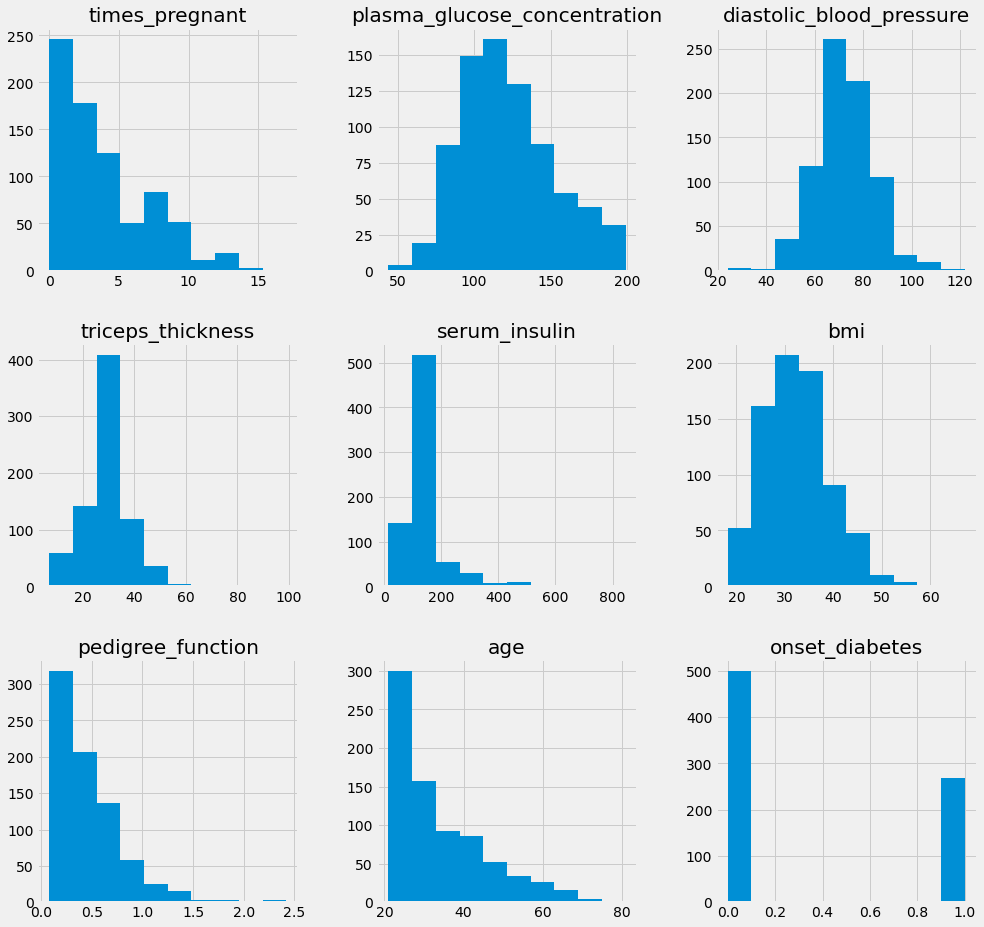

In [91]:
impute = Imputer(strategy='mean')
# 填充所有的缺失值
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima.columns)
# 画直方图
pima_imputed_mean.hist(figsize=(15, 15))

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

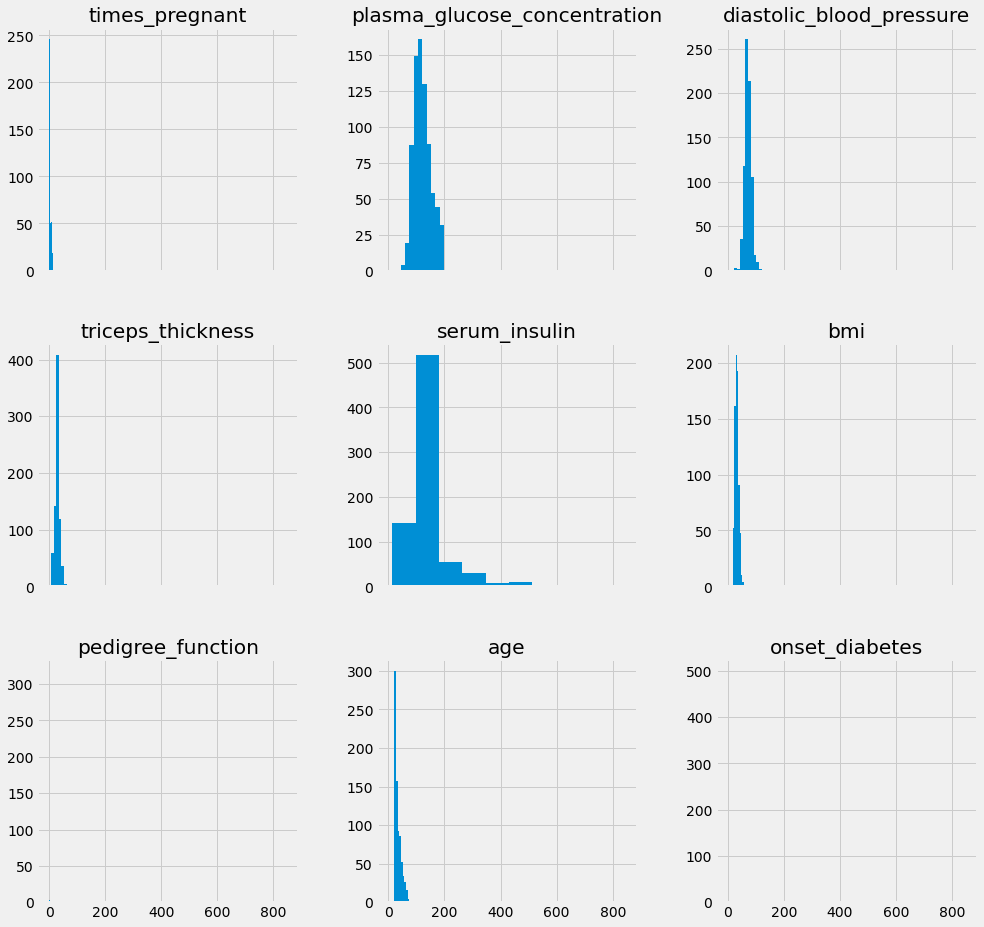

In [92]:
#我们发现每列的最大值最小值差别很大，所以我们考虑给数据进行压缩标准化
#首先我们在同一比列下查看数据直方图，在直方图方法中调用可选的sharex和sharey参数，在同一比例下查看每个图表

pima_imputed_mean.hist(figsize=(15,15),sharex=True)

# Z分数标准化

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

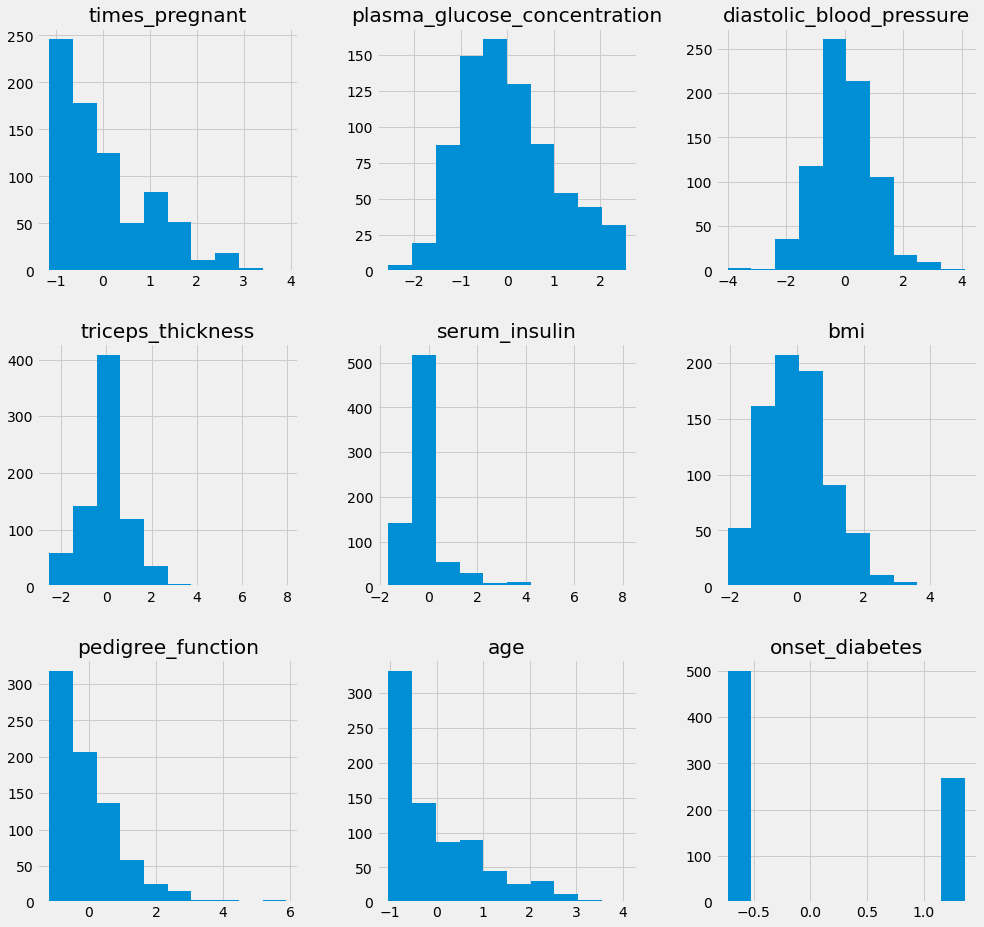

In [95]:
from sklearn.preprocessing import StandardScaler

# 用z分数标准化
scale = StandardScaler()
pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean),columns=pima.columns)
# 画直方图
pima_imputed_mean_scaled.hist(figsize=(15, 15))
#pima_imputed_mean_scaled.hist(figsize=(15,15),sharex=True)

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

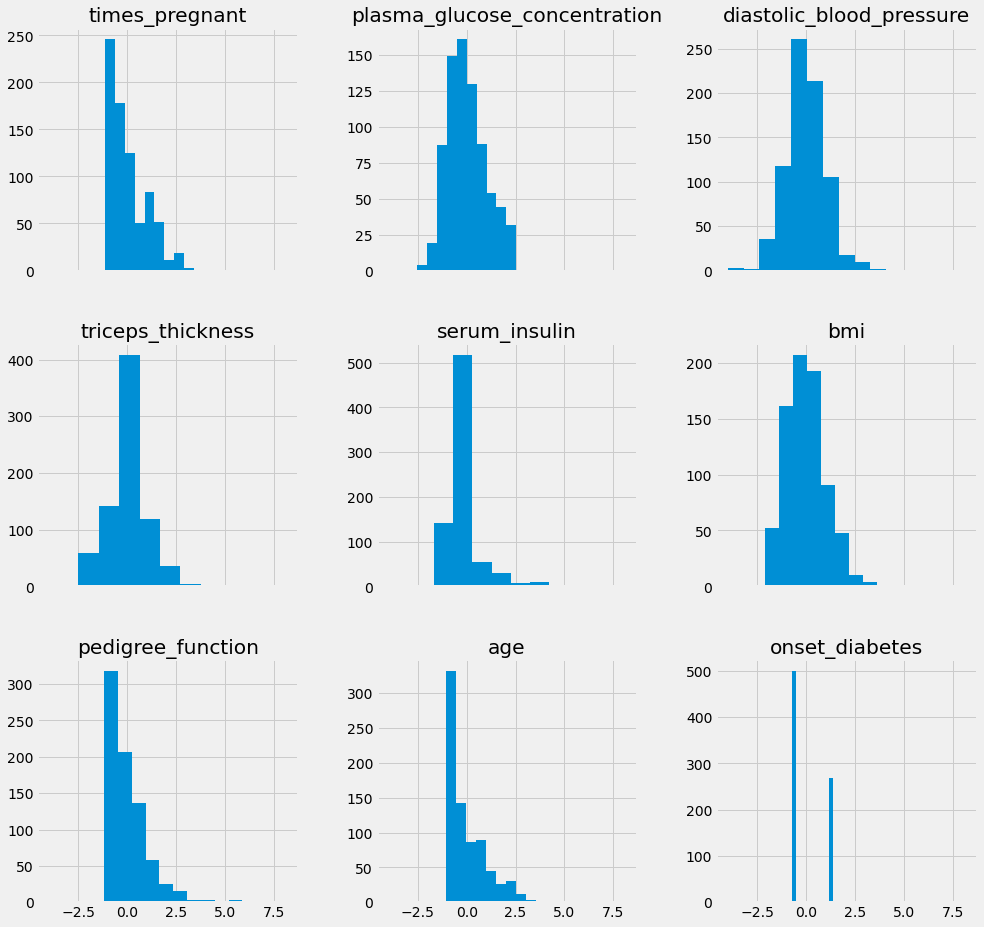

In [97]:
from sklearn.preprocessing import StandardScaler

# 用z分数标准化
scale = StandardScaler()
pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean),columns=pima.columns)
# 画直方图
pima_imputed_mean_scaled.hist(figsize=(15, 15),sharex=True)


# 流水线，填充均值，标准化、分类

In [99]:
# 将z分数标准化插入到机器学习流水线上
knn_params = {'imputer__strategy': ['mean', 'median'],
           'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]
}

mean_impute_standardize = Pipeline([
    ('imputer', Imputer()), 
    ('standardize', StandardScaler()),
    ('classify', knn)
])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print('用 均值 填补 缺失值 且 标准化后的 用knn分类准确率与最佳参数 \n',grid.best_score_, grid.best_params_)

用 均值 填补 缺失值 且 标准化后的 用knn分类准确率与最佳参数 
 0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


In [101]:
# min_max归一化
# 导入sklearn模块
from sklearn.preprocessing import MinMaxScaler
# 实例化
min_max = MinMaxScaler()

# min-max标准化
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima.columns)

In [103]:
pima_min_maxed.describe()

#这种缩放副作用是标准差都比较小，异常值的权重降低，不利于某些模型

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 6]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7487055428231899 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}
